In [8]:
#Machine Learning model Random Forest Regressor.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
data=pd.read_csv(r'C:\Users\puspa\OneDrive\Desktop\clean_data.csv' ) 
print(data.head())
columns_to_drop = ['vin', 'state', 'seller', 'saledate']
data.drop(columns_to_drop, axis=1, inplace=True)
data.dropna(inplace=True)
# Encode categorical variables
data = pd.get_dummies(data)
# Split the data into features (X) and target variable (y)
X = data.drop('sellingprice', axis=1)
y = data['sellingprice']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

    make                model        trim  year   body transmission  \
0    Kia              Sorento          LX  2015    SUV    automatic   
1    Kia              Sorento          LX  2015    SUV    automatic   
2    BMW             3 Series  328i SULEV  2014  Sedan    automatic   
3  Volvo                  S60          T5  2015  Sedan    automatic   
4    BMW  6 Series Gran Coupe        650i  2014  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca          5     16639  white    black   
1  5xyktca69fg561319    ca          5      9393  white    beige   
2  wba3c1c51ek116351    ca         45      1331   gray    black   
3  yv1612tb4f1310987    ca         41     14282  white    black   
4  wba6b2c57ed129731    ca         43      2641   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america  inc  20500         21500   
1                 kia motors america  

MemoryError: Unable to allocate 6.89 GiB for an array with shape (2446, 377860) and data type int64

In [ ]:
#Linear Regression using Ridge regression for regularization
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
# Feature Engineering
data['age'] = 2024 - data['year']
# Append the regression estimator to the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('poly', PolynomialFeatures(degree=2)),
                           ('regressor', Ridge())])  # Ridge regression for regularization
# Hyperparameter Tuning
param_grid = {
    'regressor__alpha': [0.1, 1, 10],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'vehicle_price_model.pkl')

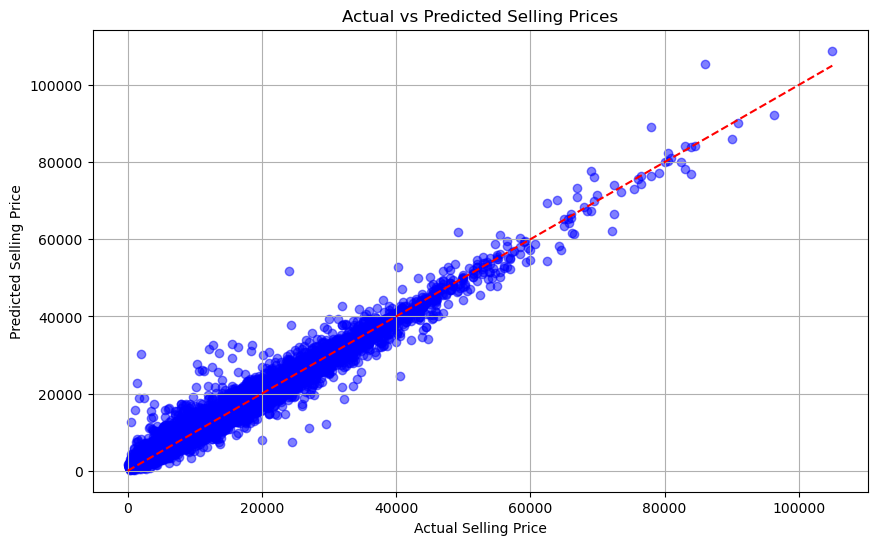

In [6]:
import matplotlib.pyplot as plt

# Plot actual vs predicted selling prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()
